In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import time
from __future__ import division
%matplotlib inline


def Euler(t,y,y1,del_t):
    for i in range(len(t))[1:]:
        y[i] = y[i-1]+(del_t)*y1[i-1]
    return y

def approx_inf_sym(func,bound_func,bound):
    x=0
    for i in range(len(func)):
        if func[i] > bound:
            func[i] = func[i-1]
        if func[i] < -bound:
            x = i
            break
        bound_func[i] = func[i]
    for i in range(x):
        bound_func[x+i+1] = -bound_func[x-i]
    return bound_func

def pop_zeros(items):
    while items[-1] == 0:
        items.pop()

        


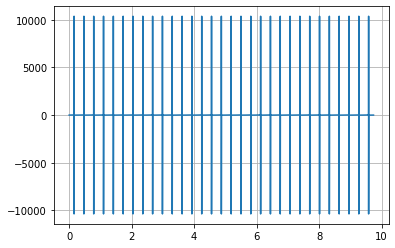

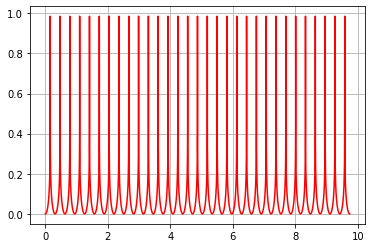

1000000
time 0.41441965103149414
time 0.8684263229370117


In [2]:
t0 = time.time()# intial time
bound = 50000# bound of asymptotic function
del_t = 10e-6  #size of integration steps
t = np.arange(0,10,del_t)
y = [0 for i in range(len(t))];y1 = [0 for i in range(len(t))];
y_ub = [0 for i in range(len(t))];
a = 10 #frequency of oscillation

diff_eq = np.tan(a*t)
bounded = approx_inf_sym(diff_eq,y1,bound)
pop_zeros(bounded)
k = math.floor(len(t)/len(bounded))
bounded = bounded*int(k)
t2 = np.arange(0,del_t*(len(bounded)),del_t)
y = y[:len(t2)]
sol = Euler(t2,y,bounded,del_t)

# unbound_sol = Euler(t,y_ub,diff_eq,del_t)

t1 = time.time() #  time
fig = plt.figure()
ax = fig.gca()
plt.plot(t2,bounded)
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.gca()
plt.plot(t2,sol,'r')
plt.grid()
plt.show()
t3 = time.time()# intial time

print(len(t))
print('time', t1-t0)
print('time', t3-t0)